In [31]:
import biotite
import biotite.structure as struc
import biotite.structure.io as strucio
import os
import biotite.structure.io.xtc as xtc
import numpy as np
import matplotlib as mpl
font = {
    
        'weight' : 'bold',
        'size'   : 20}

mpl.rc('font', **font)
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
import pandas as pd

# Bacteriochlorin

In [2]:
folder = "output_6xdc_bacteriochlorin_prot.pdb_bacteriochlorin.sdf_ESPALOMA"
pullx_bact_files = [x for x in os.listdir(folder) if "umbrella" in x and ".xvg" in x and "pullx" in x]
pullf_bact_files = [x for x in os.listdir(folder) if "umbrella" in x and ".xvg" in x and "pullf" in x]

In [3]:
def read_xvg(folder, file_name):

    try:
        path=folder + "/" + file_name
        with open(path) as f_xvg:
            xvg_lines=f_xvg.readlines()
    
        x0=np.array([float(x.strip().split()[0]) for x in xvg_lines[17:] if len(x.strip().split()) == 2])
        x1=np.array([float(x.strip().split()[1]) for x in xvg_lines[17:] if len(x.strip().split()) == 2])
        
        return xvg_lines, x0, x1
    except:
        print("Error file :: {0}".format(file_name))
        print(">>>> number of lines >> {0}".format(len(xvg_lines)))

pullx_bact_xvgs = [read_xvg(folder, x) for x in pullx_bact_files]
pullf_bact_xvgs = [read_xvg(folder, x) for x in pullf_bact_files]

In [4]:
hists_bact = read_xvg(folder, "histo.xvg")
profile_bact = read_xvg(folder, "profile.xvg")

dG_max based on PMF for bacteriochlorin is :: -6.00 kcal/mol
dG based on PMF for bacteriochlorin is :: -5.02 kcal/mol


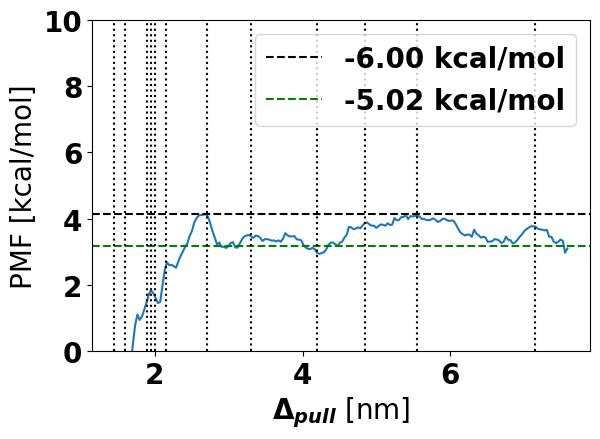

In [5]:
plt.plot(profile_bact[1], profile_bact[2])
plt.xlabel("$\Delta_{pull}$ [nm]")
plt.ylabel("PMF [kcal/mol]")
dG_max = - (profile_bact[2].max() - profile_bact[2].min())
dG = - (profile_bact[2].mean() - profile_bact[2].min())
plt.axhline(profile_bact[2].max(), ls="--", color="k",label="{:.2f} kcal/mol".format(dG_max))
plt.axhline(profile_bact[2].min(), ls="-", color="k")
plt.axhline(profile_bact[2].mean(), ls="--", color="green", label="{:.2f} kcal/mol".format(dG))
print("dG_max based on PMF for bacteriochlorin is :: {:.2f} kcal/mol".format(dG_max))
print("dG based on PMF for bacteriochlorin is :: {:.2f} kcal/mol".format(dG))
# manually selected windows:
dR_bact_man = [1.45, 1.6, 1.9, 1.95, 2.0, 2.15, 2.7, 3.3, 4.2, 4.85, 5.55, 7.15]
for dr in dR_bact_man:
    plt.axvline(dr, ls="dotted", color="k")

plt.ylim(0,10)
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("PMF_bact_handpicking_new_frames.png", dpi=800)

/imec/other/csainfra/projectdata/mayer21/miniforge3/envs/espaloma/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/imec/other/csainfra/projectdata/mayer21/miniforge3/envs/espaloma/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


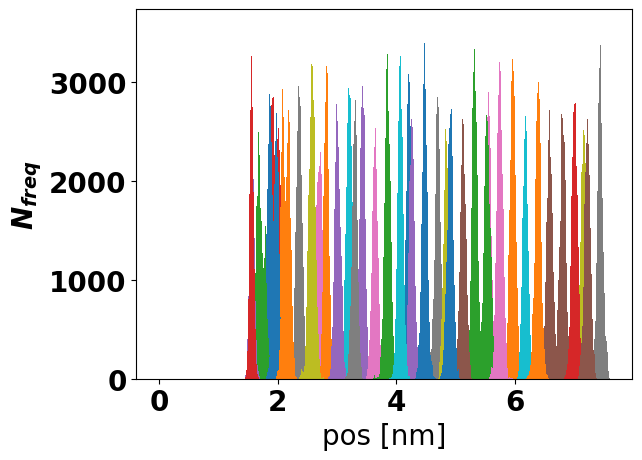

In [6]:
centers = []
for data in pullx_bact_xvgs:
    centers.append(np.median(data[2]))
    #plt.axvline(centers[-1], ls="--", color="k")
    plt.hist(data[2], bins=100)
centers = np.sort(centers)

plt.xlabel("pos [nm]")
plt.ylabel("$N_{freq}$")

new_centers = []
for i in range(len(centers)):
    if i > 0:
        c1 = centers[i]
        c2 = centers[i-1]
        new_centers.append(np.mean([c1, c2]))
        #plt.axvline(new_centers[-1], ls="dotted", color="red")

# Find new frames

In [7]:
conf0_sb431542 = strucio.load_structure('output_6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA/pulling_sb431542.pdb', model=1)
conf0_bacteriochlorin = strucio.load_structure('output_6xdc_bacteriochlorin_prot.pdb_bacteriochlorin.sdf_ESPALOMA/pulling_bacteriochlorin.pdb', model=1)


In [8]:
protein_mask = struc.filter_amino_acids(conf0_sb431542)
conf0_sb431542 = conf0_sb431542[protein_mask]
folder = "output_6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA"
traj_file_path = folder + "/6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA_npt_pulling_clustered_fit.xtc"
xtc_file_sb431542 = xtc.XTCFile.read(traj_file_path, atom_i=np.where(protein_mask)[0])
trajectory_sb431542 = xtc_file_sb431542.get_structure(conf0_sb431542)
time_sb431542 = xtc_file_sb431542.get_time()

In [9]:
protein_mask = struc.filter_amino_acids(conf0_bacteriochlorin)
conf0_bacteriochlorin = conf0_bacteriochlorin[protein_mask]
folder = "output_6xdc_bacteriochlorin_prot.pdb_bacteriochlorin.sdf_ESPALOMA"
traj_file_path_bacteriochlorin = folder + "/6xdc_bacteriochlorin_prot.pdb_bacteriochlorin.sdf_ESPALOMA_npt_pulling_clustered_fit.xtc"
xtc_file_bacteriochlorin = xtc.XTCFile.read(traj_file_path_bacteriochlorin, atom_i=np.where(protein_mask)[0])
trajectory_bacteriochlorin = xtc_file_bacteriochlorin.get_structure(conf0_bacteriochlorin)
time_bacteriochlorin = xtc_file_bacteriochlorin.get_time()

In [10]:
traj_protein_sb431542 = trajectory_sb431542[:, trajectory_sb431542.chain_id != "C"]
traj_ligand_sb431542 = trajectory_sb431542[:, trajectory_sb431542.chain_id == "C"]
traj_protein_bacteriochlorin = trajectory_bacteriochlorin[:,trajectory_bacteriochlorin.chain_id != "C"]
traj_ligand_bacteriochlorin = trajectory_bacteriochlorin[:,trajectory_bacteriochlorin.chain_id == "C"]

In [11]:
com_prot_sb431542 = struc.mass_center(traj_protein_sb431542)
com_lig_sb431542 = struc.mass_center(traj_ligand_sb431542)
com_prot_bact = struc.mass_center(traj_protein_bacteriochlorin)
com_lig_bact = struc.mass_center(traj_ligand_bacteriochlorin)

In [12]:
dR_lig_prot_sb431542 = np.linalg.norm(com_prot_sb431542 - com_lig_sb431542, axis=1)
dR_lig_prot_bact = np.linalg.norm(com_prot_bact - com_lig_bact, axis=1)

In [13]:
def funct(dR, r):
    return np.power(dR - r, 2.0)

#inds_sb431542= np.unique([np.argmin(funct(dR_lig_prot_sb431542, r)) for r in np.linspace(0, 80, 20)])
#inds_bact= np.unique([np.argmin(funct(dR_lig_prot_bact, r*10)) for r in new_centers])
inds_bact= np.unique([np.argmin(funct(dR_lig_prot_bact, r*10)) for r in dR_bact_man])

In [14]:
dR_lig_prot_bact[inds_bact]

array([15.36776187, 15.98482197, 18.97307168, 19.47936716, 19.97569339,
       21.50706453, 26.92779585, 33.01958157, 42.05862766, 48.5308631 ,
       55.53459263, 71.55002396])

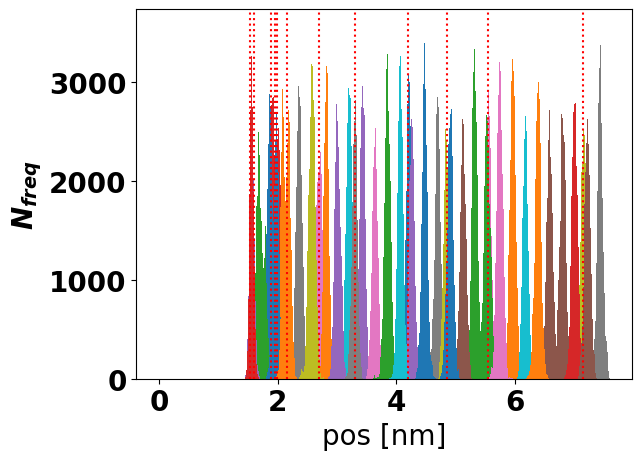

In [15]:
for data in pullx_bact_xvgs:
    plt.hist(data[2], bins=100)

plt.xlabel("pos [nm]")
plt.ylabel("$N_{freq}$")

#for i in [inds_bact[1],inds_bact[4]]:
for i in inds_bact:
    plt.axvline(dR_lig_prot_bact[i]*0.1, ls="dotted", color="red")

In [16]:
batch_job_umbrella_bact = None
with open("job_ligand_bacteriochlorin_umbrella") as f_job:
    batch_job_umbrella_bact = f_job.read()

In [17]:
bact_jobs = [x for x in os.listdir(".") if "job_ligand_bacteriochlorin_umbrella_" in x]
#for i, ind in enumerate([inds_bact[1],inds_bact[4]]):
for i, ind in enumerate(inds_bact):
    if ind > 0:
        job_to_write = batch_job_umbrella_bact.replace("__CONF__", str(ind))
        job_name = "job_ligand_bacteriochlorin_umbrella_{0}".format(ind)
        print("writing job '{0} [conf_{1}] :: exists ? :: {2}".format(job_name, ind, job_name in bact_jobs))        
        with open(job_name, "w") as f_job_out:
            f_job_out.write(job_to_write)

print("to run all jobs do :: ")
#print("$ for i in {1..19}; do sbatch job_ligand_bacteriochlorin_umbrella_${i}; done\n\n")
print("$ for x in job_ligand_bacteriochlorin_umbrella_*; do sbatch $x; done\n\n")

writing job 'job_ligand_bacteriochlorin_umbrella_28 [conf_28] :: exists ? :: True
writing job 'job_ligand_bacteriochlorin_umbrella_74 [conf_74] :: exists ? :: True
writing job 'job_ligand_bacteriochlorin_umbrella_81 [conf_81] :: exists ? :: True
writing job 'job_ligand_bacteriochlorin_umbrella_87 [conf_87] :: exists ? :: True
writing job 'job_ligand_bacteriochlorin_umbrella_106 [conf_106] :: exists ? :: True
writing job 'job_ligand_bacteriochlorin_umbrella_150 [conf_150] :: exists ? :: True
writing job 'job_ligand_bacteriochlorin_umbrella_204 [conf_204] :: exists ? :: True
writing job 'job_ligand_bacteriochlorin_umbrella_296 [conf_296] :: exists ? :: True
writing job 'job_ligand_bacteriochlorin_umbrella_349 [conf_349] :: exists ? :: True
writing job 'job_ligand_bacteriochlorin_umbrella_414 [conf_414] :: exists ? :: True
writing job 'job_ligand_bacteriochlorin_umbrella_585 [conf_585] :: exists ? :: True
to run all jobs do :: 
$ for x in job_ligand_bacteriochlorin_umbrella_*; do sbatch $

# SB431542

In [18]:
folder = "output_6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA"
pullx_sb_files = [x for x in os.listdir(folder) if "umbrella" in x and ".xvg" in x and "pullx" in x]
pullf_sb_files = [x for x in os.listdir(folder) if "umbrella" in x and ".xvg" in x and "pullf" in x]

In [19]:
pullx_sb_xvgs = [read_xvg(folder, x) for x in pullx_sb_files]
pullf_sb_xvgs = [read_xvg(folder, x) for x in pullf_sb_files]

In [20]:
hists_sb = read_xvg(folder, "histo.xvg")
profile_sb = read_xvg(folder, "profile.xvg")

dG_max based on PMF for SB431542 is :: -14.52 kcal/mol
dG based on PMF for SB431542 is :: -11.93 kcal/mol


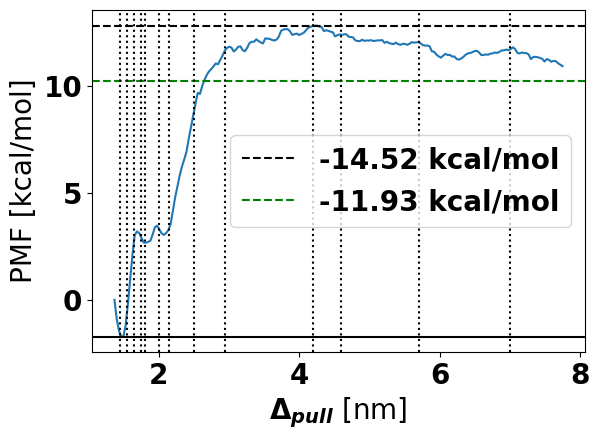

In [21]:
plt.plot(profile_sb[1], profile_sb[2])
plt.xlabel("$\Delta_{pull}$ [nm]")
plt.ylabel("PMF [kcal/mol]")
dG_max = - (profile_sb[2].max() - profile_sb[2].min())
dG = - (profile_sb[2].mean() - profile_sb[2].min())
plt.axhline(profile_sb[2].max(), ls="--", color="k",label="{:.2f} kcal/mol".format(dG_max))
plt.axhline(profile_sb[2].min(), ls="-", color="k")
plt.axhline(profile_sb[2].mean(), ls="--", color="green", label="{:.2f} kcal/mol".format(dG))
print("dG_max based on PMF for SB431542 is :: {:.2f} kcal/mol".format(dG_max))
print("dG based on PMF for SB431542 is :: {:.2f} kcal/mol".format(dG))
dR_sb_man = [1.45, 1.55, 1.65, 1.75, 1.8, 2.0, 2.15, 2.5, 2.95, 4.2, 4.6, 5.7, 7]
for dr in dR_sb_man:
    plt.axvline(dr, ls="dotted", color="k")

#plt.ylim(0, 10)
plt.legend(loc="best")
#plt.savefig("pmf_SB431542_old.png", dpi=800)
plt.tight_layout()

In [22]:
inds_sb= np.unique([np.argmin(funct(dR_lig_prot_sb431542, r*10)) for r in dR_sb_man])

/imec/other/csainfra/projectdata/mayer21/miniforge3/envs/espaloma/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/imec/other/csainfra/projectdata/mayer21/miniforge3/envs/espaloma/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, '$N_{freq}$')

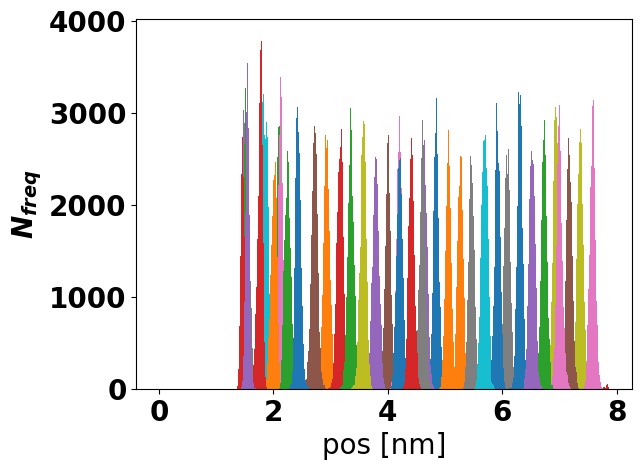

In [23]:
centers = []
for data in pullx_sb_xvgs:
    centers.append(np.median(data[2]))
    #plt.axvline(centers[-1], ls="--", color="k")
    plt.hist(data[2], bins=100)
centers = np.sort(centers)

plt.xlabel("pos [nm]")
plt.ylabel("$N_{freq}$")

#new_centers = []
#for i in range(len(centers)):
#    if i > 0:
#        c1 = centers[i]
#        c2 = centers[i-1]
#        new_centers.append(np.mean([c1, c2]))
#        #plt.axvline(new_centers[-1], ls="dotted", color="red")

#for i in inds_sb:
#    plt.axvline(dR_lig_prot_sb431542[i]*0.1, ls="dotted", color="red")

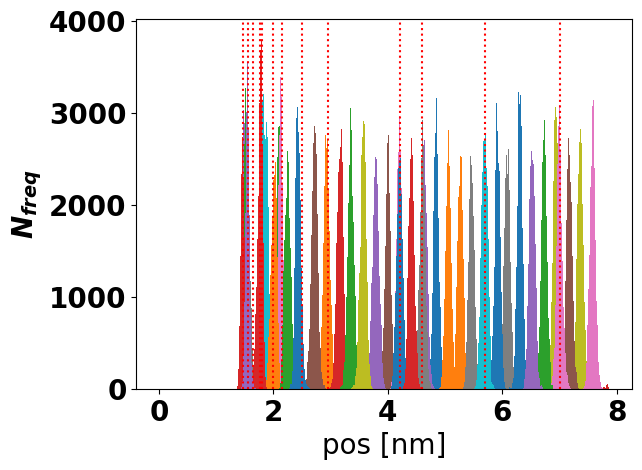

In [24]:
for data in pullx_sb_xvgs:
    plt.hist(data[2], bins=100)

plt.xlabel("pos [nm]")
plt.ylabel("$N_{freq}$")

#for i in [inds_bact[1],inds_bact[4]]:
for i in inds_sb:
    plt.axvline(dR_lig_prot_sb431542[i]*0.1, ls="dotted", color="red")

In [25]:
batch_job_umbrella_sb = None
with open("job_ligand_sb431542_umbrella") as f_job:
    batch_job_umbrella_sb = f_job.read()

In [26]:
sb_jobs = [x for x in os.listdir(".") if "job_ligand_sb431542_umbrella_" in x]
for i, ind in enumerate(inds_sb):
    if ind > 0:
        job_to_write = batch_job_umbrella_sb.replace("__CONF__", str(ind))
        job_name = "job_ligand_sb431542_umbrella_{0}".format(ind)
        print("writing job '{0} [conf_{1}] :: exists ? :: {2}".format(job_name, ind, job_name in sb_jobs))        
        with open(job_name, "w") as f_job_out:
            f_job_out.write(job_to_write)

print("to run all jobs do :: ")
#print("$ for i in {1..19}; do sbatch job_ligand_bacteriochlorin_umbrella_${i}; done\n\n")
print("$ for x in job_ligand_bacteriochlorin_umbrella_*; do sbatch $x; done\n\n")

writing job 'job_ligand_sb431542_umbrella_1 [conf_1] :: exists ? :: True
writing job 'job_ligand_sb431542_umbrella_47 [conf_47] :: exists ? :: True
writing job 'job_ligand_sb431542_umbrella_72 [conf_72] :: exists ? :: True
writing job 'job_ligand_sb431542_umbrella_85 [conf_85] :: exists ? :: True
writing job 'job_ligand_sb431542_umbrella_89 [conf_89] :: exists ? :: True
writing job 'job_ligand_sb431542_umbrella_108 [conf_108] :: exists ? :: True
writing job 'job_ligand_sb431542_umbrella_119 [conf_119] :: exists ? :: True
writing job 'job_ligand_sb431542_umbrella_145 [conf_145] :: exists ? :: True
writing job 'job_ligand_sb431542_umbrella_171 [conf_171] :: exists ? :: True
writing job 'job_ligand_sb431542_umbrella_300 [conf_300] :: exists ? :: True
writing job 'job_ligand_sb431542_umbrella_326 [conf_326] :: exists ? :: True
writing job 'job_ligand_sb431542_umbrella_449 [conf_449] :: exists ? :: True
writing job 'job_ligand_sb431542_umbrella_577 [conf_577] :: exists ? :: True
to run all 

dG_max based on PMF for bacteriochlorin is :: -6.00 kcal/mol
dG based on PMF for bacteriochlorin is :: -5.02 kcal/mol
dG_max based on PMF for SB431542 is :: -14.52 kcal/mol
dG based on PMF for SB431542 is :: -11.93 kcal/mol


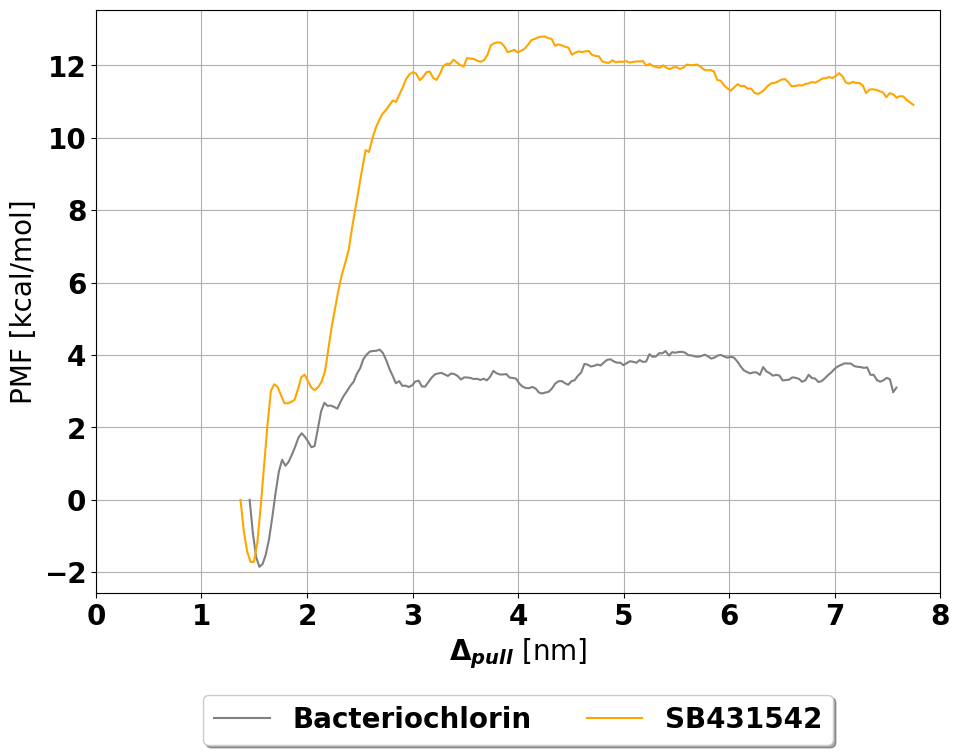

In [27]:
plt.figure(figsize=(10,8))

colors=['orange', 'gray']


plt.plot(profile_bact[1], profile_bact[2], color=colors[1], label="Bacteriochlorin")

dG_max = - (profile_bact[2].max() - profile_bact[2].min())
dG = - (profile_bact[2].mean() - profile_bact[2].min())
#plt.axhline(profile_bact[2].max(), ls="--", color="k",label="{:.2f} kcal/mol".format(dG_max))
#plt.axhline(profile_bact[2].min(), ls="-", color="k")
#plt.axhline(profile_bact[2].mean(), ls="--", color="green", label="{:.2f} kcal/mol".format(dG))

print("dG_max based on PMF for bacteriochlorin is :: {:.2f} kcal/mol".format(dG_max))
print("dG based on PMF for bacteriochlorin is :: {:.2f} kcal/mol".format(dG))

plt.plot(profile_sb[1], profile_sb[2], color=colors[0], label="SB431542")

dG_max = - (profile_sb[2].max() - profile_sb[2].min())
dG = - (profile_sb[2].mean() - profile_sb[2].min())
#plt.axhline(profile_sb[2].max(), ls="--", color="k",label="{:.2f} kcal/mol".format(dG_max))
#plt.axhline(profile_sb[2].min(), ls="-", color="k")
#plt.axhline(profile_sb[2].mean(), ls="--", color="green", label="{:.2f} kcal/mol".format(dG))
print("dG_max based on PMF for SB431542 is :: {:.2f} kcal/mol".format(dG_max))
print("dG based on PMF for SB431542 is :: {:.2f} kcal/mol".format(dG))

ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

plt.xlabel("$\Delta_{pull}$ [nm]")
plt.ylabel("PMF [kcal/mol]")
#plt.ylim(0,10)
plt.xlim(0,8)
#plt.legend(loc="best")
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)
plt.tight_layout()
plt.grid()
plt.savefig("PMF_bact_handpicking_new_frames.png", dpi=800)

In [28]:
profile_sb[2].shape

(200,)

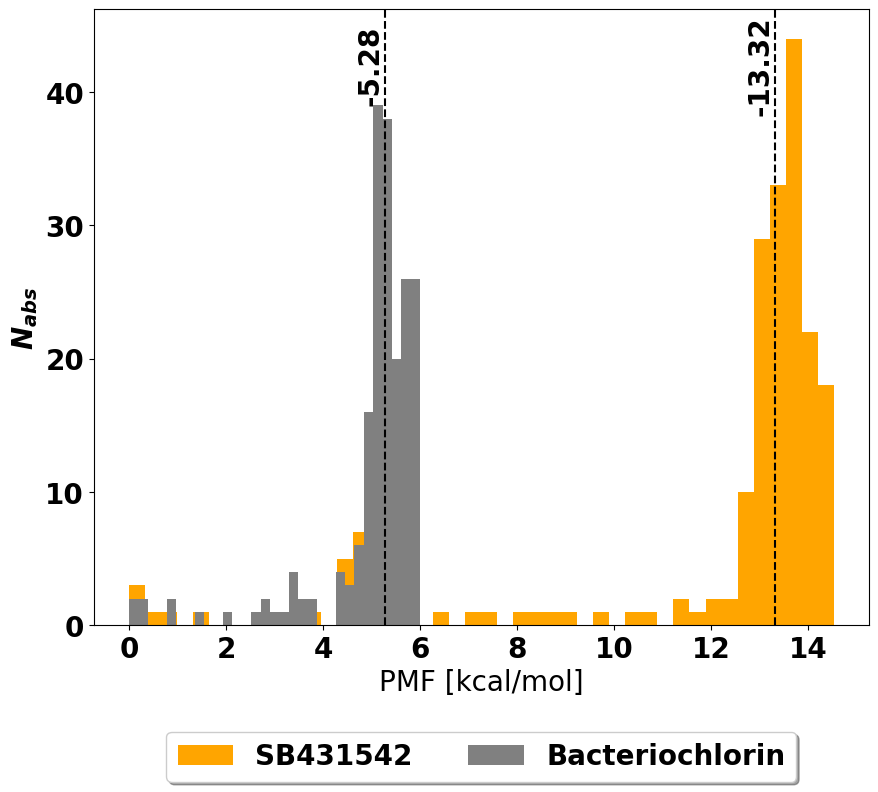

In [33]:
plt.figure(figsize=(10,8))

ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
    
dG_sb = profile_sb[2][1:] - profile_sb[2].min()
dG_bact = profile_bact[2][1:] - profile_bact[2].min()

hist_res_sb = plt.hist(dG_sb, bins="auto", color=colors[0], label="SB431542")
hist_res_bact = plt.hist(dG_bact, bins="auto", color=colors[1], label="Bacteriochlorin")

dG_sb_med = np.median(dG_sb)
dG_bact_med = np.median(dG_bact)

plt.axvline(dG_sb_med, ls="--", color="k")
plt.axvline(dG_bact_med, ls="--", color="k")
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)

plt.xlabel("PMF [kcal/mol]")
plt.ylabel("$N_{abs}$")
text(dG_sb_med - 0.6, 42, "{:.2f}".format(-dG_sb_med), rotation=90, verticalalignment='center')
text(dG_bact_med - 0.6, 42, "{:.2f}".format(-dG_bact_med), rotation=90, verticalalignment='center')
plt.savefig("dG_hist.png", dpi=800)

In [44]:
df_fig_umbrella_pmf = pd.DataFrame(
    {
        "Δr [nm] SB431542": profile_sb[1],
        "PMF [kcal/mol] SB431542": profile_sb[2],
        "Δr [nm] Bacteriochlorin": profile_bact[1],
        "PMF [kcal/mol] Bacteriochlorin": profile_bact[2],
    }
)

df_dG_raw_values = pd.DataFrame(
    {
        "ΔG [kcal/mol] SB431542": dG_sb,
        "ΔG [kcal/mol] Bacteriochlorin": dG_bact,
    }
)

In [45]:
df_dG_raw_values

,ΔG [kcal/mol] SB431542,ΔG [kcal/mol] Bacteriochlorin
0,0.846532,0.932159
1,0.279491,0.273947
2,0.000000,0.000000
3,0.004532,0.079935
4,0.545283,0.347246
...,...,...
194,12.869407,5.154307
195,12.862067,5.220949
196,12.763417,5.182833
197,12.693927,4.823121


In [46]:
!pip install openpyxl
with pd.ExcelWriter('umebrella_results.xlsx') as writer:
    df_fig_umbrella_pmf.to_excel(writer, sheet_name='Potential of mean force')
    df_dG_raw_values.to_excel(writer, sheet_name='ΔG raw values')